In [2]:
from google.colab import drive
drive.mount("/content/drive")
%cd ./drive/MyDrive/AI.Code

Mounted at /content/drive
/content/drive/MyDrive/AI.Code


In [3]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('advertising.csv', delimiter=',', skip_header=1)

X = data[:, 0:3]
y = data[:, 3:4]
maxy = np.max(y)
miny = np.min(y)
avgy = np.mean(y)
print(maxy)
print(miny)
print(avgy)
N = data.shape[0]

maxi = np.max(X)
mini = np.min(X)
avg = np.mean(X)
X = (X-avg) / (maxi-mini)

X_b = np.c_[np.ones((N, 1)), X]

27.0
1.6
15.130500000000001


In [8]:

def m_samples(epoch_max = 50, m = 20, learning_rate = 0.01):

    thetas = np.random.randn(4, 1)
    thetas_path = [thetas]
    losses = []
    for epoch in range(epoch_max):

        shuffled_indices = np.random.permutation(N)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, N, m):
            xi = X_b_shuffled[i:i + m]
            yi = y_shuffled[i:i + m]

            y_hat = xi.dot(thetas)

            loss = (y_hat - yi) ** 2

            d_loss = 2 * (y_hat - yi) / m

            gradients = xi.T.dot(d_loss)

            thetas = thetas - learning_rate * gradients
            thetas_path.append(thetas)

            loss_mean = np.sum(loss) / m
            losses.append(loss_mean)

    return thetas_path, losses


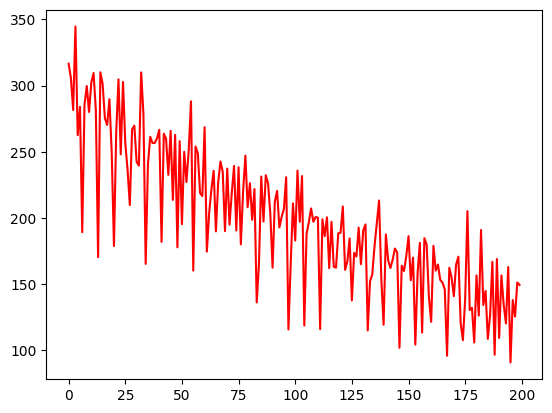

In [9]:
mbgd_thetas, losses = m_samples(50,30,0.001)

x_axis = list(range(200))
plt.plot(x_axis, losses[:200], color="r")
plt.show()